# Find the best text classification model for the sentimental analysis

1. Find which vectorization method is best (CountVectorizer, HashingVectorizer, TfidfVectorizer)
2. Find which model and hyperparameters that gives the best performance for traffic sentimental analysis (LR, KNN, RF, XGBoost, SVM, Naïve Bayes models)

# Preparatoin of data

In [46]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


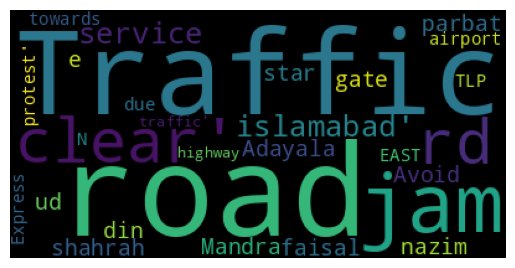

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [49]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [50]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

In [51]:
# Convert the text to vectorizer
# explaining variables
x = df['Text']

# Obtain the label
# to-be-explained variables (output)
y = df['Sentiment']



---


# Choose vectorization method

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
# vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)



From the previous exercises we have calculated the accuracy for the above vectorization methods:

CountVectorizer:
  accuracy: 0.937799043062201

HashingVectorizer:
  accuracy: 0.954 (without stop words)
  accuracy: 0.916 (with stop words)

TfidfVectorizer:
  accuracy: 0.**954** (same as HashingVectorizer.)  
  With stop-words
  accuracy: 0.973 without stop words.

  Maybe the vectorization does not have high influence on this data

  Really frequent. Model good at handling them
  model with stop words
  meadure performance of non-stop words



---

# Choose classification model

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
The accuracy of the model is: 0.9641148325358851


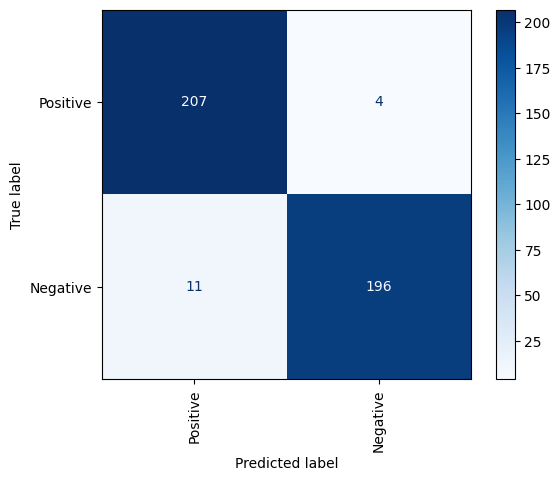

In [45]:
# here you can try use the grid search to find the best model parameter(a example is in SVM model)

#(1)LR
# model = LogisticRegression(max_iter=1000, random_state=0)
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
# }

#(2)KNN
# model=KNeighborsClassifier()
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }

#(3)RF
# model = RandomForestClassifier(random_state=0)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

#(4)XGBoost
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}


#(5)SVM
# model= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10]
# }

#(6)Naïve Bayes models
# model=BernoulliNB()
# param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

# GRID SEARCH

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_

from sklearn.metrics import accuracy_score

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))


ACCURCY WITHOUT HYPERTUNING:

LogisticRegression:
  accuracy: 0.9521531100478469

KNeighborsClassifier:
  accuracy: 0.916267942583732

RandomForestClassifier:
  accurcy: 0.9712918660287081

XGBClassifier:
  accuracy: 0.9712918660287081

SVC:
  accuracy: 0.9545454545454546

BernoulliNB:
  accuracy: 0.9401913875598086

ACCURACY **WITH** HYPERTUNING

LogisticRegression:
  accuracy: 0.9545454545454546
  
  parameters: {'C': 0.1}

KNeighborsClassifier:
  accuracy: 0.9330143540669856
  
  parameters: {'n_neighbors': 5, 'weights': 'distance'}

RandomForestClassifier:
  accurcy: **0.9712918660287081**
  
  parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

XGBClassifier:
  accuracy: **0.9712918660287081**
  
  parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

SVC:
  accuracy: 0.9593301435406698
  
  parameters: {'C': 0.1, 'kernel': 'rbf'}

BernoulliNB:
  accuracy: 0.9401913875598086
  
  parameters: {'alpha': 1, 'force_alpha': True}

After running each classification method with and without tuning hyperparameters, it is found that XGBClassifier has the best accuracy with hyperparamets set to learning_rate: 0.1, max_depth: 3, n_estimators: 200. Accuracy was then 0.9712918660287081

Here different reviews are tested to see how the model responds on reviews written by me

In [43]:
# Here you change the reviews
text = 'Mandra is not clear today'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

The prediction result of this review is: positive


'Adayala road is clear' --> positive

'traffic jam on Adayala road' --> negative

'Mandra is clear but Adayala road is not clear' --> positive

'Mandra is not clear today' --> positive